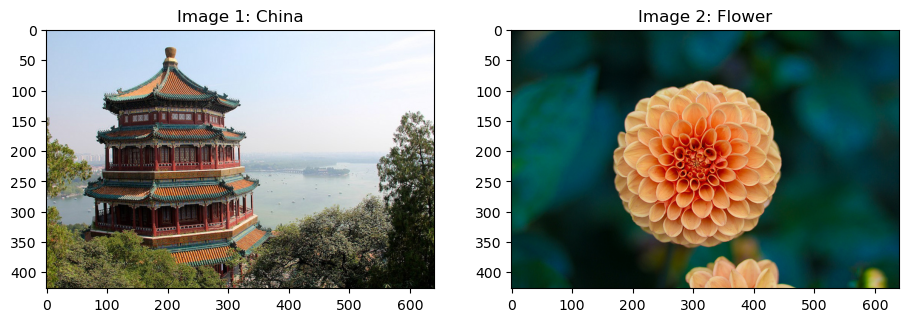

In [1]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Show both images
plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.imshow(china)
plt.title("Image 1: China")

plt.subplot(122)
plt.imshow(flower)
plt.title("Image 2: Flower")
plt.show()

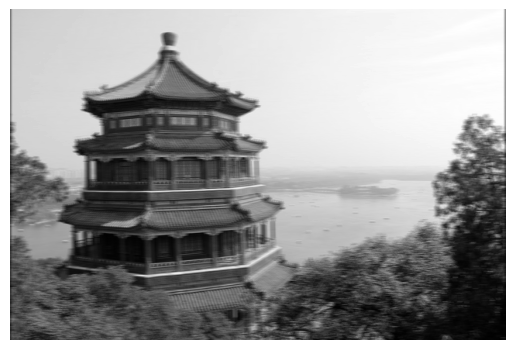

In [2]:

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray")  # plot 1st image's 2nd feature map
plt.axis("off")  # Not shown x and y axis
plt.show()

Text(0.5, 1.0, 'AvgPool')

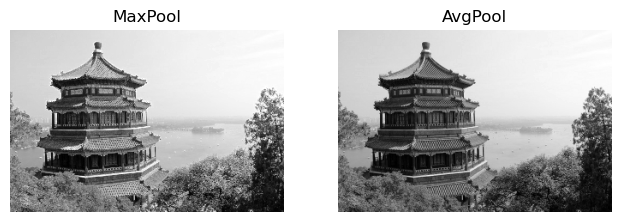

In [3]:
# Plot the images after MaxPool2D and AvgPool2D to see the difference

import keras
max_pool = keras.layers.MaxPool2D(pool_size=2)
avg_pool = keras.layers.AvgPool2D(pool_size=2)

output_max = max_pool(images)
output_avg = avg_pool(images)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.imshow(output_max[0, :, :, 1], cmap="gray")
plt.axis("off")
plt.title("MaxPool")

plt.subplot(132)
plt.imshow(output_avg[0, :, :, 1], cmap="gray")
plt.axis("off")
plt.title("AvgPool")




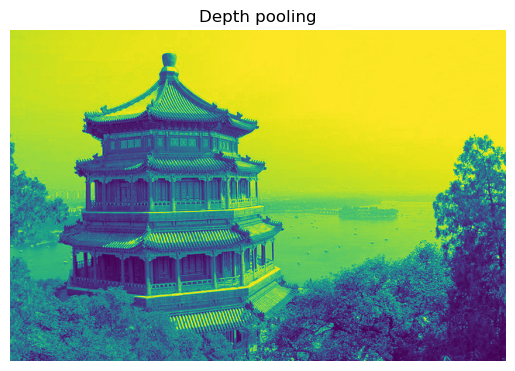

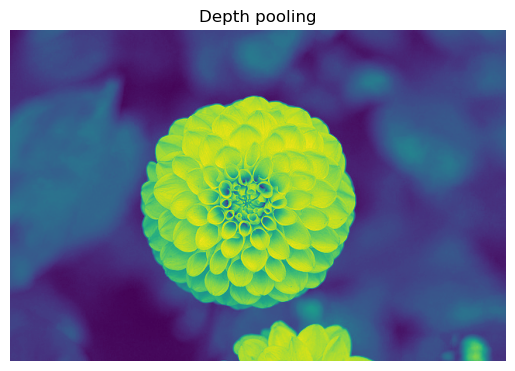

In [4]:
# Depth pooling

output = tf.nn.max_pool(images, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID")

plt.imshow(output[0])
plt.axis("off")
plt.title("Depth pooling")
plt.show()

plt.imshow(output[1])
plt.axis("off")
plt.title("Depth pooling")
plt.show()

(2, 3)


Text(0.5, 1.0, 'Global Avg Pooling')

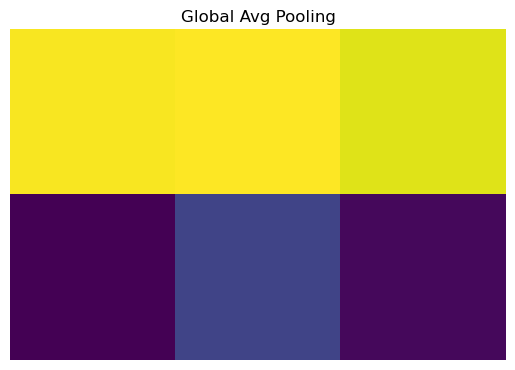

In [5]:
# Global Average Pooling

global_avg_pool = keras.layers.GlobalAvgPool2D()
output = global_avg_pool(images)

print(output.shape)
plt.imshow(output)
plt.axis("off")
plt.title("Global Avg Pooling")

In [7]:
from functools import partial
from sklearn.model_selection import train_test_split

# MNIST FASHION
fashion_mnist = keras.datasets.fashion_mnist


(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1)

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation="relu", padding="SAME")

input_shape = [28, 28, 1]

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
1688/1688 [==============================] - 81s 47ms/step - loss: 0.7078 - accuracy: 0.7513 - val_loss: 0.3601 - val_accuracy: 0.8657
Epoch 2/10
1688/1688 [==============================] - 78s 46ms/step - loss: 0.3978 - accuracy: 0.8663 - val_loss: 0.3349 - val_accuracy: 0.8840
Epoch 3/10
1688/1688 [==============================] - 72s 42ms/step - loss: 0.3401 - accuracy: 0.8840 - val_loss: 0.2752 - val_accuracy: 0.8948
Epoch 4/10
1688/1688 [==============================] - 70s 41ms/step - loss: 0.3034 - accuracy: 0.8971 - val_loss: 0.2743 - val_accuracy: 0.9060
Epoch 5/10
1688/1688 [==============================] - 72s 42ms/step - loss: 0.2831 - accuracy: 0.9036 - val_loss: 0.2981 - val_accuracy: 0.8948
Epoch 6/10
1688/1688 [==============================] - ETA: 0s - loss: 0.2673 - accuracy: 0.9098

KeyboardInterrupt: 